In [1]:
import os
import matplotlib.pyplot as plt
import scipy
import numpy as np
import networkx as nx

In [7]:
import pickle
import glob
import pandas as pd
import numpy as np
from tqdm import tqdm
files = glob.glob("/media/dan/Big/manuiscript_0001_hfo_rates/data/hfo_counts/*.pkl")

lowdfs = []
highdfs = []
for file in tqdm(files):
    with open(file, "rb") as f:
        data = pickle.load(f)
    try:
        lowdfs.append(data['lowerband_hfos_standardref'].hfo_df)
    except:
        print(f"{file} has no lowerband_hfos_standardref")
        continue
    try:
        highdfs.append(data['higherband_hfos_standardref'].hfo_df)
    except:
        print(f"{file} has no higherband_hfos_standardref")
        continue

lowdfs = pd.concat(lowdfs)
highdfs = pd.concat(highdfs)

 67%|██████▋   | 48/72 [00:13<00:04,  5.19it/s]

/media/dan/Big/manuiscript_0001_hfo_rates/data/hfo_counts/037_hfocounts.pkl has no higherband_hfos_standardref
/media/dan/Big/manuiscript_0001_hfo_rates/data/hfo_counts/038_hfocounts.pkl has no higherband_hfos_standardref


 71%|███████   | 51/72 [00:13<00:04,  4.26it/s]

/media/dan/Big/manuiscript_0001_hfo_rates/data/hfo_counts/041_hfocounts.pkl has no higherband_hfos_standardref


100%|██████████| 72/72 [00:20<00:00,  3.51it/s]


In [ ]:
print(len(lowdfs))
print(len(highdfs))

In [4]:
df = pd.read_csv("/media/dan/Big/manuiscript_0001_hfo_rates/data/hfo_results_patientnorm_df.csv")
df.columns.values

array(['pid', 'age_days_at_recording', 'age_years_at_recording',
       'seizureFree', 'electrode', 'soz', 'electrode_hemisphere',
       'white_matter', 'recording_length_min', 'aal', 'id_aal',
       'aal_flat', 'id_aal_flat', 'aal_label', 'id_aal_label', 'hlevel_0',
       'id_hlevel_0', 'aryaG1', 'id_aryaG1', 'aryaG2', 'id_aryaG2',
       'aryaG3', 'id_aryaG3', 'electrodegroup', 'id_electrodegroup',
       'Lb_hfo_count', 'log_Lb_hfo_count',
       'zlog_Lb_hfo_count~wholepatient', 'zlog_Lb_hfo_count~aal',
       'zlog_Lb_hfo_count~aal_flat', 'zlog_Lb_hfo_count~hlevel_0',
       'zlog_Lb_hfo_count~aryaG1', 'zlog_Lb_hfo_count~aryaG2',
       'zlog_Lb_hfo_count~aryaG3', 'Hb_hfo_count', 'log_Hb_hfo_count',
       'zlog_Hb_hfo_count~wholepatient', 'zlog_Hb_hfo_count~aal',
       'zlog_Hb_hfo_count~aal_flat', 'zlog_Hb_hfo_count~hlevel_0',
       'zlog_Hb_hfo_count~aryaG1', 'zlog_Hb_hfo_count~aryaG2',
       'zlog_Hb_hfo_count~aryaG3', 'full_hfo_count', 'log_full_hfo_count',
       'zlog

In [9]:
z = df.groupby(['pid','electrodegroup',], group_keys=False)['Hb_hfo_ratepermin'].apply(lambda x: (x-x.mean())/x.std())

# check if any are nan
print(z.isna().any())

# check if any are inf
print(z.isin([np.inf, -np.inf]).any())




True
False


In [2]:
path = "/media/dan/Data2/calculations/connectivity/additional_calcs/mats"
folders = os.listdir(path)

In [1]:
undirected_subfolders = {'bary-sq_euclidean_max': 'lowest',
'bary-sq_euclidean_mean': 'lowest',
'bary_euclidean_max': 'lowest',
'ce_gaussian': 'highest',
'cohmag_multitaper_mean_fs-1_fmin-0-000488_fmax-0-00195': 'lowest',
'cohmag_multitaper_mean_fs-1_fmin-0-000488_fmax-0-0342': 'lowest',
'cohmag_multitaper_mean_fs-1_fmin-0-000488_fmax-0-122': 'lowest',
'cohmag_multitaper_mean_fs-1_fmin-0-00195_fmax-0-00391': 'lowest',
'cohmag_multitaper_mean_fs-1_fmin-0-00391_fmax-0-00586': 'lowest',
'cohmag_multitaper_mean_fs-1_fmin-0-00586_fmax-0-0146': 'lowest',
'cohmag_multitaper_mean_fs-1_fmin-0-0146_fmax-0-0342': 'lowest',
'cohmag_multitaper_mean_fs-1_fmin-0-0342_fmax-0-0732': 'lowest',
'cohmag_multitaper_mean_fs-1_fmin-0-0342_fmax-0-122': 'lowest',
'cohmag_multitaper_mean_fs-1_fmin-0-0732_fmax-0-122': 'lowest',
'cohmag_multitaper_mean_fs-1_fmin-0_fmax-0-5': 'lowest',
'cov-sq_EmpiricalCovariance': 'lowest',
'cov-sq_GraphicalLassoCV': 'lowest',
'cov-sq_LedoitWolf': 'lowest',
'cov-sq_MinCovDet': 'lowest',
'cov-sq_OAS': 'lowest',
'cov-sq_ShrunkCovariance': 'lowest',
'cov_EmpiricalCovariance': 'lowest',
'cov_GraphicalLassoCV': 'lowest',
'cov_LedoitWolf': 'lowest',
'cov_MinCovDet': 'lowest',
'cov_OAS': 'lowest',
'cov_ShrunkCovariance': 'lowest',
'dspli_multitaper_mean_fs-1_fmin-0-000488_fmax-0-00195': 'lowest',
'dspli_multitaper_mean_fs-1_fmin-0-000488_fmax-0-0342': 'lowest',
'dspli_multitaper_mean_fs-1_fmin-0-000488_fmax-0-122': 'lowest',
'dspli_multitaper_mean_fs-1_fmin-0-00195_fmax-0-00391': 'lowest',
'dspli_multitaper_mean_fs-1_fmin-0-00391_fmax-0-00586': 'lowest',
'dspli_multitaper_mean_fs-1_fmin-0-00586_fmax-0-0146': 'lowest',
'dspli_multitaper_mean_fs-1_fmin-0-0146_fmax-0-0342': 'lowest',
'dspli_multitaper_mean_fs-1_fmin-0-0342_fmax-0-122': 'lowest',
'dspli_multitaper_mean_fs-1_fmin-0-0732_fmax-0-122': 'lowest',
'dspli_multitaper_mean_fs-1_fmin-0_fmax-0-5': 'lowest',
'dswpli_multitaper_mean_fs-1_fmin-0-000488_fmax-0-00195': 'lowest',
'dswpli_multitaper_mean_fs-1_fmin-0-000488_fmax-0-0342': 'lowest',
'dswpli_multitaper_mean_fs-1_fmin-0-000488_fmax-0-122': 'lowest',
'dswpli_multitaper_mean_fs-1_fmin-0-00195_fmax-0-00391': 'lowest',
'dswpli_multitaper_mean_fs-1_fmin-0-00391_fmax-0-00586': 'lowest',
'dswpli_multitaper_mean_fs-1_fmin-0-00586_fmax-0-0146': 'lowest',
'dswpli_multitaper_mean_fs-1_fmin-0-0146_fmax-0-0342': 'lowest',
'dswpli_multitaper_mean_fs-1_fmin-0-0342_fmax-0-122': 'lowest',
'dswpli_multitaper_mean_fs-1_fmin-0-0732_fmax-0-122': 'lowest',
'dswpli_multitaper_mean_fs-1_fmin-0_fmax-0-5': 'lowest',
'mi_gaussian': 'lowest',
'pdist_braycurtis': 'highest',
'pdist_canberra': 'highest',
'pdist_chebyshev': 'highest',
'pdist_cityblock': 'highest',
'pdist_cosine': 'highest',
'pdist_euclidean': 'highest',
'pec': 'lowest',
'pec_log': 'lowest',
'pec_orth_abs': 'lowest',
'pec_orth_log': 'lowest',
'pec_orth_log_abs': 'lowest',
'dspli_multitaper_mean_fs-1_fmin-0-0342_fmax-0-0732': 'lowest',
'dswpli_multitaper_mean_fs-1_fmin-0-0342_fmax-0-0732': 'lowest',
'kendalltau-sq': 'lowest',
'pec_orth': 'lowest',
'ppc_multitaper_mean_fs-1_fmin-0-000488_fmax-0-00195': 'lowest',
'prec_OAS': 'highest',
'prec-sq_GraphicalLasso': 'lowest',
'prec-sq_GraphicalLassoCV': 'lowest',
'prec-sq_LedoitWolf': 'lowest',
'prec-sq_OAS': 'lowest',
'prec-sq_ShrunkCovariance': 'lowest',
'prec_GraphicalLasso': 'highest',
'prec_GraphicalLassoCV': 'highest',
'prec_LedoitWolf': 'highest',
'prec_ShrunkCovariance': 'highest',
'spearmanr': 'lowest',
'spearmanr-sq': 'lowest',
'xcorr-sq_max_sig-False': 'lowest',
'xcorr-sq_mean_sig-False': 'lowest',
'xcorr_max_sig-False': 'lowest',
'xcorr_mean_sig-False': 'lowest',
'je_gaussian': 'highest',
'ppc_multitaper_mean_fs-1_fmin-0-000488_fmax-0-0342': 'lowest',
'ppc_multitaper_mean_fs-1_fmin-0-000488_fmax-0-122': 'lowest',
'ppc_multitaper_mean_fs-1_fmin-0-00195_fmax-0-00391': 'lowest',
'ppc_multitaper_mean_fs-1_fmin-0-00391_fmax-0-00586': 'lowest',
'ppc_multitaper_mean_fs-1_fmin-0-00586_fmax-0-0146': 'lowest',
'ppc_multitaper_mean_fs-1_fmin-0-0146_fmax-0-0342': 'lowest',
'ppc_multitaper_mean_fs-1_fmin-0-0342_fmax-0-0732': 'lowest',
'ppc_multitaper_mean_fs-1_fmin-0-0342_fmax-0-122': 'lowest',
'ppc_multitaper_mean_fs-1_fmin-0-0732_fmax-0-122': 'lowest',
'ppc_multitaper_mean_fs-1_fmin-0_fmax-0-5': 'lowest',
}

In [98]:

def find_disconnect_threshold(adj_matrix, removal_order="highest"):
    n = adj_matrix.shape[0]
    # Use only the upper triangular portion (assuming symmetry)
    adj = adj_matrix.copy()
    adj[np.tril_indices(n, k=-1)] = np.nan

    # Build the edge list from the upper triangle
    edges = []
    for i in range(n):
        for j in range(i, n):
            if not np.isnan(adj[i, j]):
                edges.append((i, j, adj[i, j]))

    # Sort edges by weight
    reverse = True if removal_order == "highest" else False
    sorted_edges = sorted(edges, key=lambda x: x[2], reverse=reverse)

    # Binary search boundaries
    low, high = 0, len(sorted_edges)
    threshold_index = len(sorted_edges)  # default if graph never disconnects

    # Helper: Union-Find structure
    parent = list(range(n))
    def find(x):
        while parent[x] != x:
            parent[x] = parent[parent[x]]
            x = parent[x]
        return x

    def union(x, y):
        root_x = find(x)
        root_y = find(y)
        if root_x != root_y:
            parent[root_y] = root_x

    # Binary search for the minimal index that disconnects the graph
    # cnt = 0
    while low < high:
        # cnt += 1
        mid = (low + high) // 2
        # Reset union-find for this iteration
        parent = list(range(n))
        # Add edges from sorted_edges[mid:] (i.e. the ones not yet removed)
        for i in range(mid, len(sorted_edges)):
            u, v, _ = sorted_edges[i]
            union(u, v)

        # Check if the graph is connected
        rep = find(0)
        connected = all(find(i) == rep for i in range(n))

        if connected:
            # Still connected: need to remove more edges.
            low = mid + 1
        else:
            # Disconnected: record mid as a candidate and try a smaller removal.
            threshold_index = mid - 1
            high = mid

    # build the symmetric thresholded adjacency matrix
    adj_hat = np.empty_like(adj_matrix)
    adj_hat[:] = np.nan
    for i in range(threshold_index, len(sorted_edges)):
        u, v, w = sorted_edges[i]
        adj_hat[u, v] = w
        adj_hat[v, u] = w
    
    # print(cnt)

    # threshold_index is the minimal number of removals needed
    return  adj_hat, threshold_index

def undirected_edge_addition(adj_matrix, removal_order="highest"):
    """
    Edge addition on an undirected graph.
    Starts with 0 edges (only nodes) and adds edges until the graph is weakly connected.

    Parameters:
        adj_matrix (2D array): symmetric matrix of edge weights.
        removal_order (str): "highest" or "lowest" which corresponds to the removal ordering.
                             For "highest", removal removes high-weight edges first so the kept
                             edges are low-weight ones. Thus, for addition we add low-weight edges first.
                             Conversely for "lowest".
                             
    Returns:
        added_edges (NxN array): symmetric adjacency matrix after adding edges until weak connectivity.
        addition_step (int): number of edges added when weak connectivity is first achieved.
    """

    n = adj_matrix.shape[0]
    # Create an empty directed graph with all nodes.
    G = nx.DiGraph()
    G.add_nodes_from(range(n))

    # Restrict to the upper triangular portion.
    adj = adj_matrix.copy()
    adj[np.tril_indices(n, k=-1)] = np.nan

    # Extract edges from the upper triangle.
    edges = []
    for i in range(n):
        for j in range(n):
            if not np.isnan(adj[i, j]):
                edges.append((i, j, adj[i, j]))

    # Sort edges in the same order as the removal function.
    # For removal_order=="highest", removal sorted descending (highest first)
    # so for addition we add in the opposite order (ascending).
    reverse = True if removal_order == "highest" else False
    sorted_edges = sorted(edges, key=lambda x: x[2], reverse=reverse)
    addition_order = sorted_edges[::-1]

    addition_step = 0
    # Add edges until the graph is weakly connected.
    for u, v, w in addition_order:
        G.add_edge(u, v, weight=w)
        addition_step += 1
        if nx.is_weakly_connected(G):
            # Once connected, build a symmetric adjacency matrix.
            adj_result = nx.to_numpy_array(G, nonedge=float('nan'))
            # Reconstruct the symmetric matrix from the upper triangle.
            adj_result = np.triu(adj_result)
            adj_result = adj_result + adj_result.T
            return adj_result, addition_step

    # If connectivity was never reached, return the full graph.
    adj_result = nx.to_numpy_array(G, nonedge=float('nan'))
    adj_result = np.triu(adj_result)
    adj_result = adj_result + adj_result.T
    return adj_result, addition_step


In [95]:

def org_undirected_edge_removal(adj_matrix, removal_order="highest"):
    """
    Edge removal on an undirected graph.
    Removal stops when any node becomes isolated (degree==0).

    Parameters:
        adj_matrix (2D array): symmetric matrix of edge weights.
        removal_order (str): "highest" or "lowest" to determine removal order.

    Returns:
        removed_edges (NxN array): adjacency matrix after edges have been removed.
        removal_step (int): number of edges removed when break occurred.
    """
    # make adj_matrix only upper triangular
    adj = adj_matrix.copy()
    adj[np.tril_indices(adj.shape[0], k=-1)] = np.nan
    G = nx.DiGraph()
    n = adj.shape[0]
    for i in range(n):
        for j in range(n):
            if not np.isnan(adj[i, j]):
                G.add_edge(i, j, weight=adj[i, j])

    # Get edges with weights
    edges = [(u, v, data["weight"]) for u, v, data in G.edges(data=True)]

    # Sort edges based on weight
    reverse = True if removal_order == "highest" else False
    sorted_edges = sorted(edges, key=lambda x: x[2], reverse=reverse)
    
    removal_step = 0
    for u, v, w in sorted_edges:
        G.remove_edge(u, v)

        # Check if any node is isolated
        if not nx.is_weakly_connected(G):
            G.add_edge(u, v, weight=w)
            adj = nx.to_numpy_array(G, nonedge=float('nan'))
            # make adj_matrix symmetric
            adj = np.triu(adj)
            adj = adj + adj.T
            return adj, removal_step

        removal_step += 1
    
    adj = nx.to_numpy_array(G, nonedge=float('nan'))
    # make adj_matrix symmetric
    adj = np.triu(adj)
    adj = adj + adj.T
    return adj, removal_step

In [92]:
folderpath = "/media/dan/Data2/calculations/connectivity/additional_calcs/mats"
for subfolder, removal_order in undirected_subfolders.items():
    measure_path = os.path.join(folderpath, subfolder)
    measure_files = os.listdir(measure_path)
    print(subfolder)
    for measure_file in measure_files:
        # Remove .mat from filename
        print(measure_file)
        base_name = os.path.basename(measure_file).replace(".mat", "")
        mat = scipy.io.loadmat(os.path.join(measure_path, measure_file))
        undirected_adj = mat["measure"]
        n = undirected_adj.shape[0]
        break
    break

bary-sq_euclidean_max
bary-sq_euclidean_max~001.mat


In [97]:
i = 0
measure= 'bary-sq_euclidean_max'

adj = undirected_adj[i, ...]

adj_hat, threshold = undirected_edge_addition(adj, removal_order= undirected_subfolders[measure])

b, bthresh = find_disconnect_threshold(adj, removal_order= undirected_subfolders[measure])

org, orgthresh = org_undirected_edge_removal(adj, removal_order= undirected_subfolders[measure])

org[np.isnan(org)] = 0
adj_hat[np.isnan(adj_hat)] = 0
b[np.isnan(b)] = 0
print(np.allclose(org, adj_hat))

print(np.allclose(b, adj_hat))

print(np.allclose(org, b))


13
True
True
True


In [102]:
def a():
    org_undirected_edge_removal(adj, removal_order= undirected_subfolders[measure])
def b():
    find_disconnect_threshold(adj, removal_order= undirected_subfolders[measure])
def c():
    undirected_edge_addition(adj, removal_order= undirected_subfolders[measure])


In [103]:
import timeit

a_time = timeit.timeit(a, number=100)
b_time = timeit.timeit(b, number=100)
c_time = timeit.timeit(c, number=100)

print(a_time, b_time, c_time)



16.94140652695205 1.433353170985356 7.792177585011814


In [106]:
julia = np.load('/media/dan/Data2/calculations/connectivity/additional_calcs/test/bary-sq_euclidean_max/bary-sq_euclidean_max~001~000000~threshadj~lowest~5587.npy')
julia[np.isnan(julia)] = 0

np.allclose(julia, org)





True

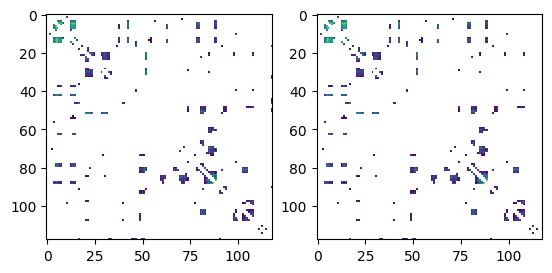

In [94]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(adj_hat)
ax[1].imshow(b)

In [80]:
print(threshold)
print(bthresh)

1316
5587


In [81]:
path = "/media/dan/Data2/calculations/connectivity/additional_calcs/thresholded_mats/bary-sq_euclidean_max"
files = sorted(os.listdir(path))

data = {}
for z, file in enumerate(files):
    if file.endswith(".npy"):
        # file format: base_name + ~{pid}~{i:06}~threshadj~{removal_order}~{step}.npy 
        # example bary-sq_euclidean_max~001~000000~threshadj~lowest~5587.npy
        # extract pid,  i, step
        pid = int(file.split("~")[1])
        if pid != 1:
            continue
        if z == 0:
            print(file)
        i = int(file.split("~")[2])
        step = int(file.split("~")[5].split(".")[0])
        if pid not in data:
            data[pid] = {'net': [], 'steps': []}
        with open(os.path.join(path, file), "rb") as f:
            net = np.load(f)
        data[pid]['net'].append(net)
        data[pid]['steps'].append(step)



bary-sq_euclidean_max~001~000000~threshadj~lowest~5587.npy


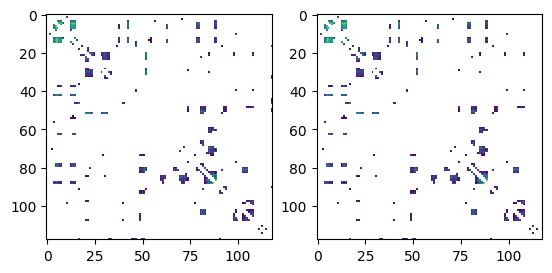

In [82]:
a = data[1]['net'][0]

fig, ax = plt.subplots(1, 2)
ax[0].imshow(a)
ax[1].imshow(adj_hat)






In [83]:
# set nan to 0
a[np.isnan(a)] = 0
adj_hat[np.isnan(adj_hat)] = 0


In [84]:
np.allclose(a, adj_hat)

True

In [85]:

output_folder = "/media/dan/Data2/calculations/connectivity/additional_calcs/thresholded_mats"

undirected_subfolders = {'bary-sq_euclidean_max': 'lowest',
'bary-sq_euclidean_mean': 'lowest',
'bary_euclidean_max': 'lowest',
'ce_gaussian': 'highest',
'cohmag_multitaper_mean_fs-1_fmin-0-000488_fmax-0-00195': 'lowest',
'cohmag_multitaper_mean_fs-1_fmin-0-000488_fmax-0-0342': 'lowest',
'cohmag_multitaper_mean_fs-1_fmin-0-000488_fmax-0-122': 'lowest',
'cohmag_multitaper_mean_fs-1_fmin-0-00195_fmax-0-00391': 'lowest',
'cohmag_multitaper_mean_fs-1_fmin-0-00391_fmax-0-00586': 'lowest',
'cohmag_multitaper_mean_fs-1_fmin-0-00586_fmax-0-0146': 'lowest',
'cohmag_multitaper_mean_fs-1_fmin-0-0146_fmax-0-0342': 'lowest',
'cohmag_multitaper_mean_fs-1_fmin-0-0342_fmax-0-0732': 'lowest',
'cohmag_multitaper_mean_fs-1_fmin-0-0342_fmax-0-122': 'lowest',
'cohmag_multitaper_mean_fs-1_fmin-0-0732_fmax-0-122': 'lowest',
'cohmag_multitaper_mean_fs-1_fmin-0_fmax-0-5': 'lowest',
'cov-sq_EmpiricalCovariance': 'lowest',
'cov-sq_GraphicalLassoCV': 'lowest',
'cov-sq_LedoitWolf': 'lowest',
'cov-sq_MinCovDet': 'lowest',
'cov-sq_OAS': 'lowest',
'cov-sq_ShrunkCovariance': 'lowest',
'cov_EmpiricalCovariance': 'lowest',
'cov_GraphicalLassoCV': 'lowest',
'cov_LedoitWolf': 'lowest',
'cov_MinCovDet': 'lowest',
'cov_OAS': 'lowest',
'cov_ShrunkCovariance': 'lowest',
'dspli_multitaper_mean_fs-1_fmin-0-000488_fmax-0-00195': 'lowest',
'dspli_multitaper_mean_fs-1_fmin-0-000488_fmax-0-0342': 'lowest',
'dspli_multitaper_mean_fs-1_fmin-0-000488_fmax-0-122': 'lowest',
'dspli_multitaper_mean_fs-1_fmin-0-00195_fmax-0-00391': 'lowest',
'dspli_multitaper_mean_fs-1_fmin-0-00391_fmax-0-00586': 'lowest',
'dspli_multitaper_mean_fs-1_fmin-0-00586_fmax-0-0146': 'lowest',
'dspli_multitaper_mean_fs-1_fmin-0-0146_fmax-0-0342': 'lowest',
'dspli_multitaper_mean_fs-1_fmin-0-0342_fmax-0-122': 'lowest',
'dspli_multitaper_mean_fs-1_fmin-0-0732_fmax-0-122': 'lowest',
'dspli_multitaper_mean_fs-1_fmin-0_fmax-0-5': 'lowest',
'dswpli_multitaper_mean_fs-1_fmin-0-000488_fmax-0-00195': 'lowest',
'dswpli_multitaper_mean_fs-1_fmin-0-000488_fmax-0-0342': 'lowest',
'dswpli_multitaper_mean_fs-1_fmin-0-000488_fmax-0-122': 'lowest',
'dswpli_multitaper_mean_fs-1_fmin-0-00195_fmax-0-00391': 'lowest',
'dswpli_multitaper_mean_fs-1_fmin-0-00391_fmax-0-00586': 'lowest',
'dswpli_multitaper_mean_fs-1_fmin-0-00586_fmax-0-0146': 'lowest',
'dswpli_multitaper_mean_fs-1_fmin-0-0146_fmax-0-0342': 'lowest',
'dswpli_multitaper_mean_fs-1_fmin-0-0342_fmax-0-122': 'lowest',
'dswpli_multitaper_mean_fs-1_fmin-0-0732_fmax-0-122': 'lowest',
'dswpli_multitaper_mean_fs-1_fmin-0_fmax-0-5': 'lowest',
'mi_gaussian': 'lowest',
'pdist_braycurtis': 'highest',
'pdist_canberra': 'highest',
'pdist_chebyshev': 'highest',
'pdist_cityblock': 'highest',
'pdist_cosine': 'highest',
'pdist_euclidean': 'highest',
'pec': 'lowest',
'pec_log': 'lowest',
'pec_orth_abs': 'lowest',
'pec_orth_log': 'lowest',
'pec_orth_log_abs': 'lowest',
'dspli_multitaper_mean_fs-1_fmin-0-0342_fmax-0-0732': 'lowest',
'dswpli_multitaper_mean_fs-1_fmin-0-0342_fmax-0-0732': 'lowest',
'kendalltau-sq': 'lowest',
'pec_orth': 'lowest',
'ppc_multitaper_mean_fs-1_fmin-0-000488_fmax-0-00195': 'lowest',
'prec_OAS': 'highest',
'prec-sq_GraphicalLasso': 'lowest',
'prec-sq_GraphicalLassoCV': 'lowest',
'prec-sq_LedoitWolf': 'lowest',
'prec-sq_OAS': 'lowest',
'prec-sq_ShrunkCovariance': 'lowest',
'prec_GraphicalLasso': 'highest',
'prec_GraphicalLassoCV': 'highest',
'prec_LedoitWolf': 'highest',
'prec_ShrunkCovariance': 'highest',
'spearmanr': 'lowest',
'spearmanr-sq': 'lowest',
'xcorr-sq_max_sig-False': 'lowest',
'xcorr-sq_mean_sig-False': 'lowest',
'xcorr_max_sig-False': 'lowest',
'xcorr_mean_sig-False': 'lowest',
'je_gaussian': 'highest',
'ppc_multitaper_mean_fs-1_fmin-0-000488_fmax-0-0342': 'lowest',
'ppc_multitaper_mean_fs-1_fmin-0-000488_fmax-0-122': 'lowest',
'ppc_multitaper_mean_fs-1_fmin-0-00195_fmax-0-00391': 'lowest',
'ppc_multitaper_mean_fs-1_fmin-0-00391_fmax-0-00586': 'lowest',
'ppc_multitaper_mean_fs-1_fmin-0-00586_fmax-0-0146': 'lowest',
'ppc_multitaper_mean_fs-1_fmin-0-0146_fmax-0-0342': 'lowest',
'ppc_multitaper_mean_fs-1_fmin-0-0342_fmax-0-0732': 'lowest',
'ppc_multitaper_mean_fs-1_fmin-0-0342_fmax-0-122': 'lowest',
'ppc_multitaper_mean_fs-1_fmin-0-0732_fmax-0-122': 'lowest',
'ppc_multitaper_mean_fs-1_fmin-0_fmax-0-5': 'lowest',
}

